In [13]:
import pandas as pd
import numpy as np

from models.svd import FunkSVD
from tools.metrics import calculate_rmse
from tools.print import print_metrics
from sklearn.model_selection import KFold,train_test_split

In [14]:
ratings_df = pd.read_csv('datasets/ml-latest-small/ratings.csv', encoding='latin-1')

In [15]:
train, test = train_test_split(ratings_df,test_size=0.2)
rmses = []
model = FunkSVD(n_factors=60, n_steps=200)
model.fit(train, test)

Step 10: Validation RMSE: 0.9096187787569284
Step 20: Validation RMSE: 0.892078415348075
Step 30: Validation RMSE: 0.8835816209449264
Step 40: Validation RMSE: 0.8783573362754976
Step 50: Validation RMSE: 0.8747580307090633
Step 60: Validation RMSE: 0.8720850373128275
Step 70: Validation RMSE: 0.8699785884642237
Step 80: Validation RMSE: 0.868229402351194
Step 90: Validation RMSE: 0.8667063634102953
Step 100: Validation RMSE: 0.8653258000982702
Step 110: Validation RMSE: 0.8640377784476692
Step 120: Validation RMSE: 0.862819026708048
Step 130: Validation RMSE: 0.8616672284486591
Step 140: Validation RMSE: 0.8605943123510567
Step 150: Validation RMSE: 0.859618714999431
Step 160: Validation RMSE: 0.8587581318840211
Step 170: Validation RMSE: 0.8580244527120111
Step 180: Validation RMSE: 0.8574216313207109
Step 190: Validation RMSE: 0.8569460709171501
Step 200: Validation RMSE: 0.856588463219353


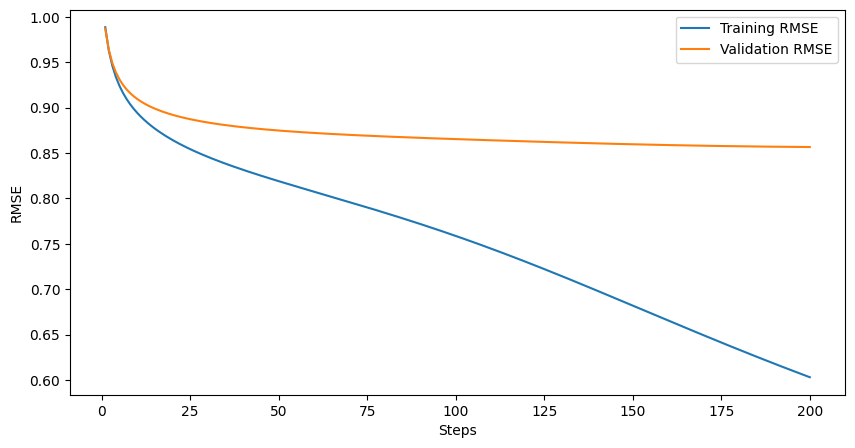

In [16]:
model.plot_losses()

In [18]:
def cross_validate(model_class, data, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    rmses = []
    
    for train_index, test_index in kf.split(data):
        train_df = data.iloc[train_index]
        test_df = data.iloc[test_index]
        
        model = model_class(n_factors=60, n_steps=150)
        model.fit(train_df)
        
        pred_ratings = model.predict(test_df)
        true_ratings = test_df['rating'].values
        
        rmse = calculate_rmse(pred_ratings, true_ratings)
        rmses.append(rmse)
        print(f'Fold RMSE: {rmse}')
    
    print(f'Average RMSE: {np.mean(rmses)}')

model_class = FunkSVD
cross_validate(model_class, ratings_df, k=5)

Fold RMSE: 0.8798191755690482
Fold RMSE: 0.8666385747448017
Fold RMSE: 0.8624622464068056
Fold RMSE: 0.87136677464148
Fold RMSE: 0.8774708379524054
Average RMSE: 0.8715515218629083
